# DiploDatos Kaggle Competition

https://www.kaggle.com/competitions/aprendizaje-supervisado-2022/

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

# Descripciones de archivos y campos de datos

* train.csv Datos sobre gran parte de los pasajeros, a ser usados para entrenamiento.

   > * PassengerId - Un identificador para cada pasajero.
   > * HomePlanet - El planeta del cual partió el pasajero. Típicamente su planeta de residencia permanente.
   > * CryoSleep - Indica si el pasajero fue electo a ser puesto en suspensión animada durante la duración del viaje. Los pasajeros en CryoSleep están confinados a sus cabinas.
   > * Cabin - El número de cabina en donde el pasajero se está quedando. Toma la forma piso/número/lado, donde el lado puede ser P por Port (babor, izquierda) o S por Starboard (estribor, derecha).
   > * Destination - El destino en donde va a desembarcar el pasajero.
   > * Age - La edad del pasajero.
   > * VIP - Si el pasajero pagó por servicios VIP durante el viaje.
   > * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Cantidad que el pasajero ha gastado en cada una de las comodidades de lujo del Spaceship Titanic.
   > * Name - El nombre y apellido de cada pasajero.
   > * Transported - Si el pasajero fue transportado a otra dimensión o no. Esta es la columna target, la columna a predecir.

* test.csv Records personales de los restantes pasajeros, a ser utilizados como datos nuevos desconocidos. Tu objetivo es predecir si cada pasajero de este conjunto fue transportado a otra dimensión o no (variable "Transported"). 


# Analisis estadistico

In [ ]:
import seaborn
import numpy
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


In [ ]:
df.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


Las etiquetas están balanceadas ya que la media de la columna "Transported" se aproxima al 0.5.

Analizaremos la distribución de las variables y los boxplots para saber cómo están distribuidos los datos con los que contamos.

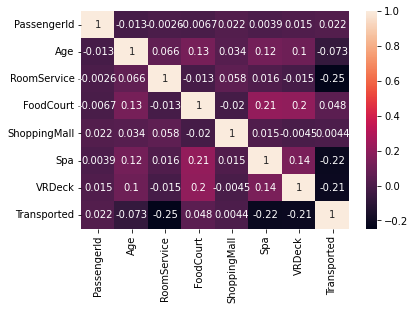

In [ ]:
#Analizamos si existe correlacion entre las varibles (tal como están):
import matplotlib.pyplot as plt
corr_df = df.corr()

seaborn.heatmap(corr_df, annot=True)
plt.show()

Se interpreta muy baja correlación entre las variables.

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

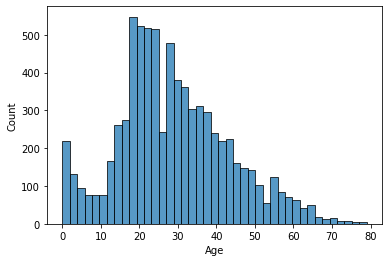

In [ ]:
seaborn.histplot(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


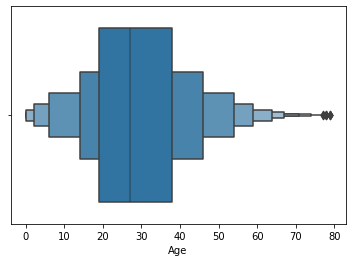

In [ ]:
seaborn.boxenplot(df.Age)

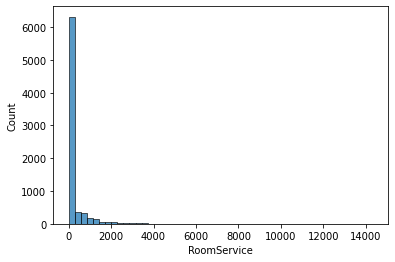

In [ ]:
seaborn.histplot(df.RoomService,bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


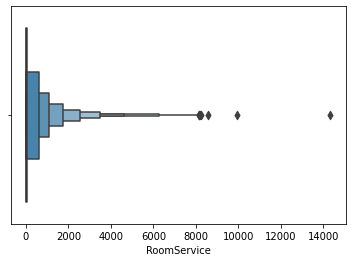

In [ ]:
seaborn.boxenplot(df.RoomService)

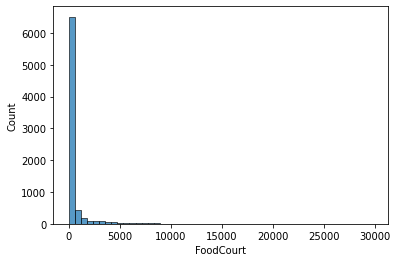

In [ ]:
seaborn.histplot(df.FoodCourt,bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


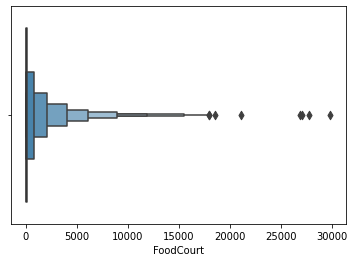

In [ ]:
seaborn.boxenplot(df.FoodCourt)

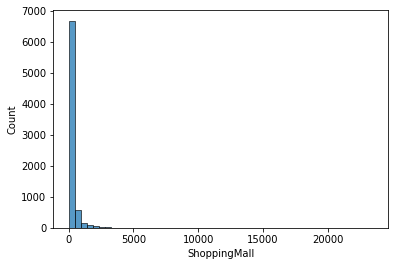

In [ ]:
seaborn.histplot(df.ShoppingMall,bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


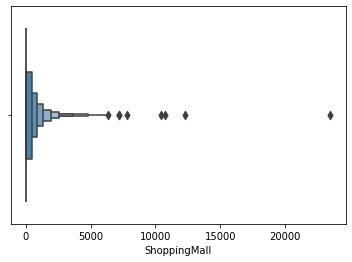

In [ ]:
seaborn.boxenplot(df.ShoppingMall)

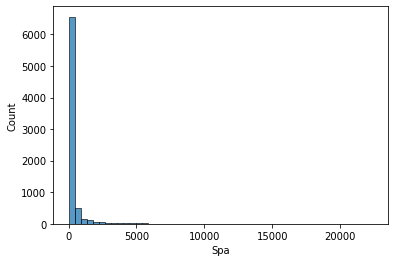

In [ ]:
seaborn.histplot(df.Spa,bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


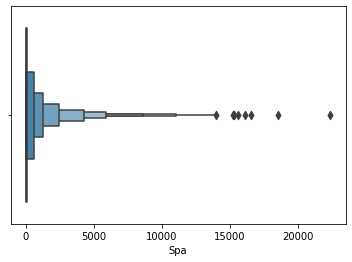

In [ ]:
seaborn.boxenplot(df.Spa)

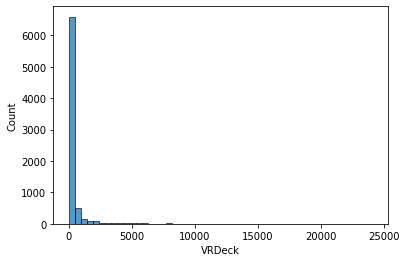

In [ ]:
seaborn.histplot(df.VRDeck,bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


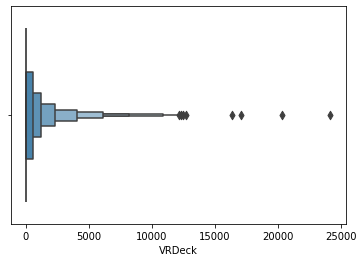

In [ ]:
seaborn.boxenplot(df.VRDeck)

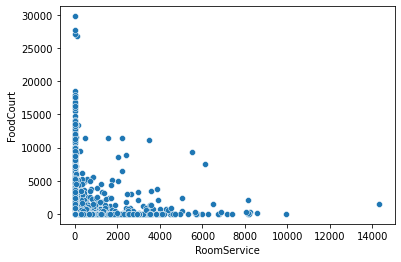

In [ ]:
seaborn.scatterplot(data=df, x = 'RoomService', y = 'FoodCourt')

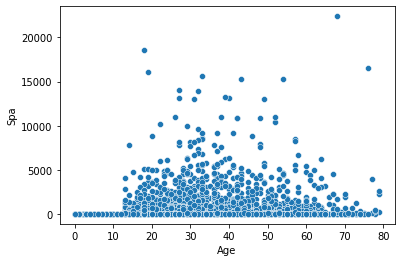

In [ ]:
seaborn.scatterplot(data=df, x = 'Age', y = 'Spa')

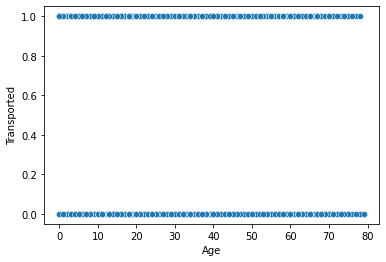

In [ ]:
seaborn.scatterplot(data=df, x = 'Age', y = 'Transported')

In [ ]:
# Transported by Age
#seaborn.histplot(df[df.Transported == 1],x="Age")

In [ ]:
# Non-Transported by Age
#seaborn.histplot(df[df.Transported == 0],x="Age")

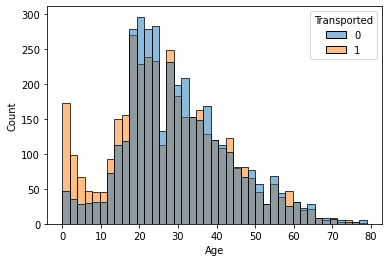

In [ ]:
# Transported/Non-transported by Age
seaborn.histplot(df, x="Age", hue="Transported")

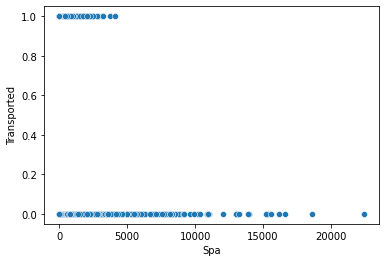

In [ ]:
seaborn.scatterplot(data=df, x = 'Spa', y = 'Transported')

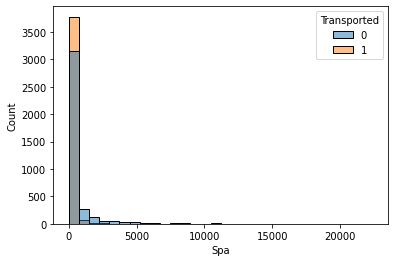

In [ ]:
seaborn.histplot(df, x="Spa", hue="Transported", bins=30)

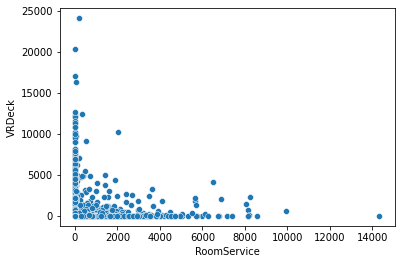

In [ ]:
#Analizamos pares de vairables conjuntas
seaborn.scatterplot(data=df, x = 'RoomService', y = 'VRDeck')

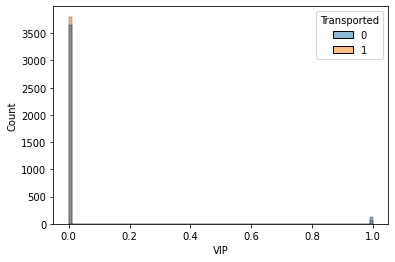

In [ ]:
seaborn.histplot(df,x="VIP",hue="Transported", bins=100)

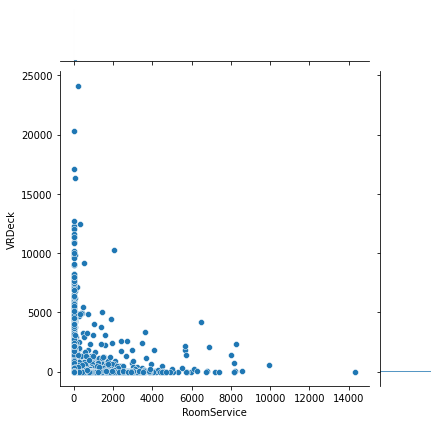

In [ ]:
seaborn.jointplot(data=df, x = 'RoomService', y = 'VRDeck')#,kind="kde")

Con este primer análisis nos convencimos de que debemos limpiar outliers. En principio no encontramos correlación entre variables.

# Curacion

## Limpieza de outliers numericos

In [ ]:
def clean_outliers_max_q(dataset, column_name, quantile,  show=False):
    value = dataset[column_name].quantile(quantile)

    interesting_col = dataset[column_name]
    print(f"Columna {column_name}:")
    mask_outlier = (interesting_col <= (value))
    print(f"Maximo:{value}")
    mask_outlier = (mask_outlier) | (pd.isnull(interesting_col)) | (pd.isna(interesting_col))
    result = dataset[mask_outlier]
    
    print(f"\tSe eliminaron {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      seaborn.boxenplot(dataset[column_name], ax=axes[0]).set_title("Original")
      seaborn.boxenplot(result[column_name], ax=axes[1]).set_title(f"Tirando valores mayores al quantil {quantile}")

    return result

def clean_outliers_min_q(dataset, column_name, quantile,  show=False):

    value = dataset[column_name].quantile(quantile)

    interesting_col = dataset[column_name]
    print(f"Columna {column_name}:")
    mask_outlier = (interesting_col >= (value))
    print(f"Minimo:{value}")
    mask_outlier = (mask_outlier) | (pd.isnull(interesting_col)) | (pd.isna(interesting_col))
    result = dataset[mask_outlier]
    
    print(f"\tSe eliminaron {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      seaborn.boxenplot(dataset[column_name], ax=axes[0]).set_title("Original")
      seaborn.boxenplot(result[column_name], ax=axes[1]).set_title(f"Tirando valores menores al quantil {quantile}")

    return result

In [ ]:
# Usamos la función clean outliers para remover valores extremos considerando
# los rangos quartílicos
def clean_outliers(dataset, column_name, upper=True, lower=True,  show=False, keep_nulls=True):
    """Returns dataset removing the outlier rows from column @column_name."""

    
    # Computing IQR
    Q1 = dataset[column_name].quantile(0.25)
    Q3 = dataset[column_name].quantile(0.75)
    IQR = Q3 - Q1  
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    print(f"Columna {column_name}:")
    if upper and lower:
      mask_outlier = (interesting_col <= (Q3+1.5*IQR)) & (interesting_col >= (Q1-1.5*IQR))
      print(f"\tMinimo: {Q1-1.5*IQR}, Maximo:{Q3+1.5*IQR}")
    elif lower:
      mask_outlier = (interesting_col >= (Q1-1.5*IQR))
      print(f"\tMinimo: {Q1-1.5*IQR}")
    elif upper:
      mask_outlier = (interesting_col <= (Q3+1.5*IQR))
      print(f"\tMaximo:{Q3+1.5*IQR}")
    else:
      raise ValueError
    if keep_nulls:
      mask_outlier = (mask_outlier) | (pd.isnull(interesting_col)) | (pd.isna(interesting_col))
    result = dataset[mask_outlier]
    
    print(f"\tSe eliminaron {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      seaborn.boxenplot(dataset[column_name], ax=axes[0]).set_title("Original")
      seaborn.boxenplot(result[column_name], ax=axes[1]).set_title("Tirando valores extremos segun IQR")

    return result

Columna RoomService:
Maximo:3161.7599999999875
	Se eliminaron 77 registros de 7823


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


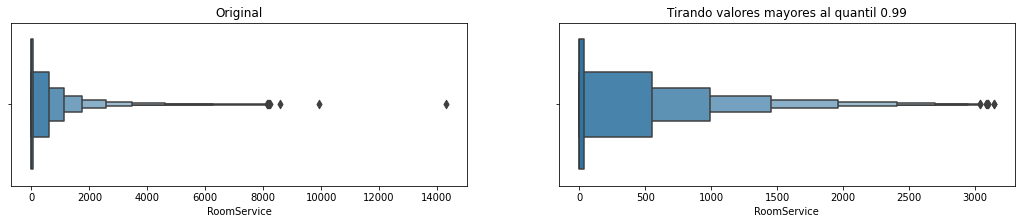

In [ ]:
df_limpio = clean_outliers_max_q(df, "RoomService", 0.99,  show=True)

Columna FoodCourt:
Maximo:7973.800000000003
	Se eliminaron 76 registros de 7746


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


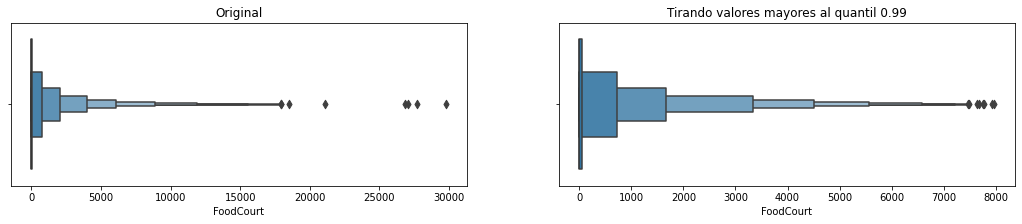

In [ ]:
df_limpio = clean_outliers_max_q(df_limpio, "FoodCourt", 0.99,  show=True)

Columna ShoppingMall:
Maximo:2317.8200000000015
	Se eliminaron 75 registros de 7670


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


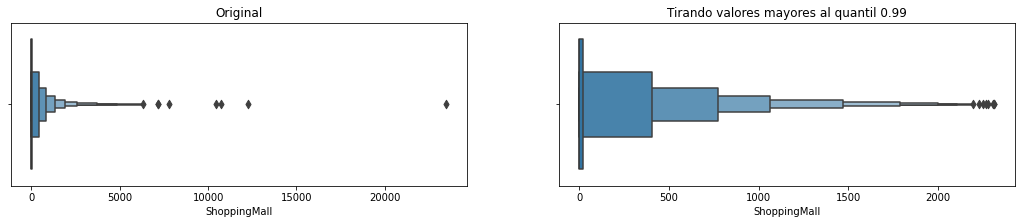

In [ ]:
df_limpio = clean_outliers_max_q(df_limpio, "ShoppingMall", 0.99,  show=True)

Columna Spa:
Maximo:4978.839999999986
	Se eliminaron 75 registros de 7595


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


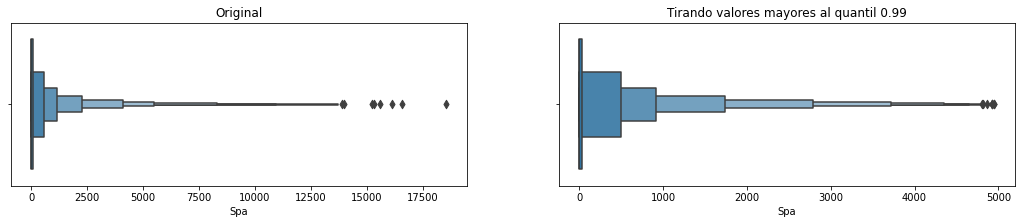

In [ ]:
df_limpio = clean_outliers_max_q(df_limpio, "Spa", 0.99,  show=True)

Columna VRDeck:
Maximo:5010.02999999999
	Se eliminaron 74 registros de 7520


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


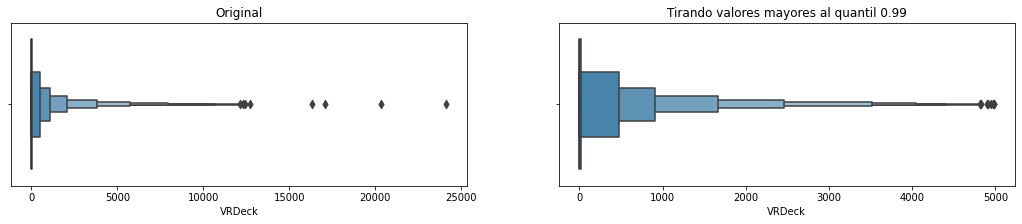

In [ ]:
df_limpio = clean_outliers_max_q(df_limpio, "VRDeck", 0.99,  show=True)

In [ ]:
df_limpio

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


Luego de la limpieza de outliers numéricos nos quedamos con 7446 de los 7823 registros originales, descartamos casi el 5%. 

## Variables Categoricas

In [ ]:
df_limpio.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Dividimos Cabin

In [ ]:
# maneja bien los nulos y los nan
df_limpio[['Cabin_f','Cabin_n', "Cabin_s"]]=df_limpio.Cabin.str.split('/',expand=True)

Dividimos el nombre

In [ ]:
# todo valor en la columna name tiene un solo espacio
df_limpio[['Name_1','Name_2']]=df_limpio.Name.str.split(' ',expand=True)

Elimino columnas redundantes

In [ ]:
df_sin_redundancia = df_limpio.copy()
df_sin_redundancia.drop('Cabin', inplace=True, axis=1)
df_sin_redundancia.drop('Name', inplace=True, axis=1)
df_sin_redundancia

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
0,3430,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0,C,123,P,Azhah,Tronsive
1,669,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1,F,126,S,Roswal,Sha
2,8430,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,B,343,S,Shaiam,Tinganking
3,6463,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0,F,1420,P,Landa,Grifford
4,85,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0,G,9,P,Gracy,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1,F,1319,S,Risps,Hacle
7819,2693,Earth,False,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,0,G,459,S,Gabrie,Reenez
7820,8076,Mars,True,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,1,F,1772,P,Panzel,Ruity
7821,3829,Earth,False,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,0,E,253,P,Belly,Weavesend


Empiezo a revisar datos faltantes

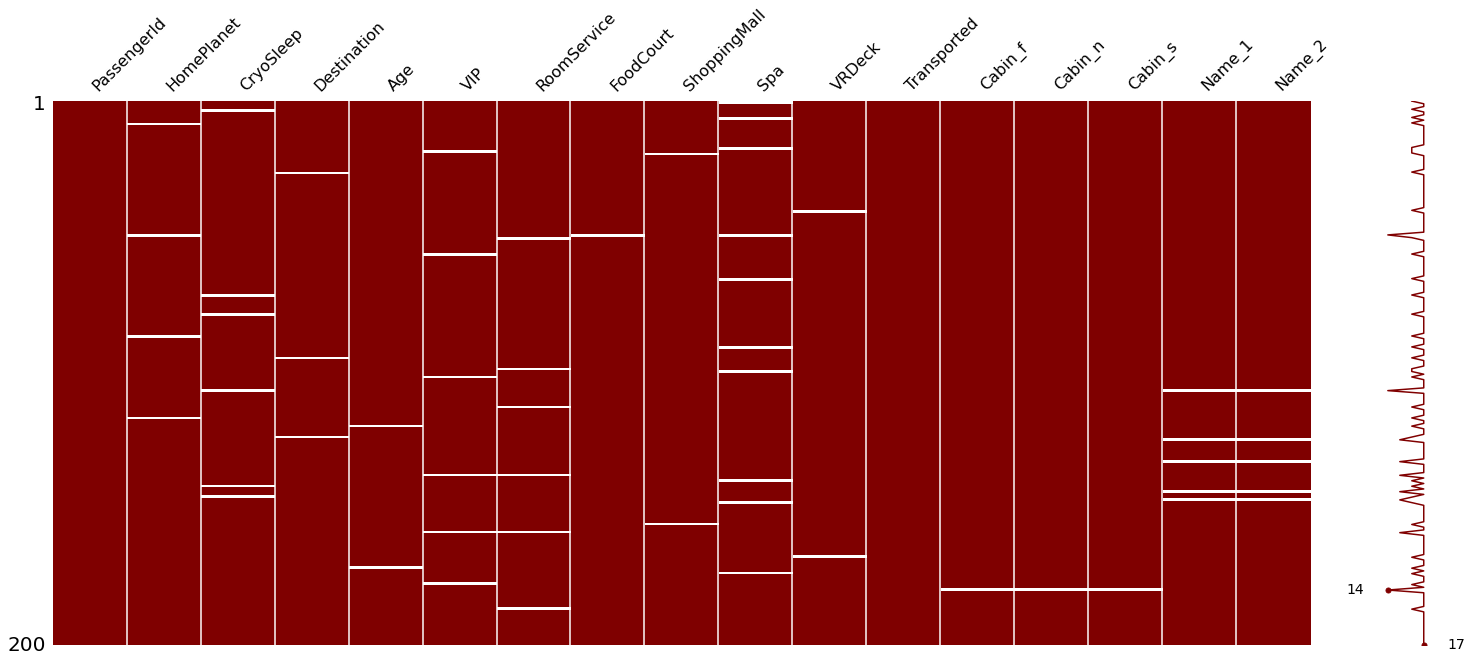

In [ ]:
import missingno as msno

msno.matrix(df_sin_redundancia.sample(200), color=[0.5,0,0])

In [ ]:
df_sin_redundancia.CryoSleep = pd.to_numeric(df_sin_redundancia.CryoSleep)
df_sin_redundancia.VIP = pd.to_numeric(df_sin_redundancia.VIP)
df_sin_redundancia.Cabin_n = pd.to_numeric(df_sin_redundancia.Cabin_n)
df_sin_redundancia[df_sin_redundancia.HomePlanet.isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
33,5988,NaN,0.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,G,1022.0,P,Stanya,Schmondez
49,2544,NaN,1.0,TRAPPIST-1e,52.0,0.0,0.0,0.0,0.0,0.0,0.0,1,G,433.0,S,Royce,Douglasen
98,4374,NaN,1.0,TRAPPIST-1e,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1,B,154.0,P,Rotan,Seflock
160,6030,NaN,0.0,TRAPPIST-1e,13.0,0.0,1144.0,0.0,6.0,0.0,0.0,0,F,1320.0,P,Karena,Prickmantes
166,6267,NaN,1.0,TRAPPIST-1e,64.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,Alasmon,Dischod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,8319,NaN,0.0,TRAPPIST-1e,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,G,1438.0,P,Rence,Monroellynn
7619,3370,NaN,0.0,TRAPPIST-1e,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0,G,594.0,P,Dawne,Tranklinay
7701,5689,NaN,0.0,TRAPPIST-1e,40.0,0.0,521.0,4.0,53.0,70.0,141.0,0,E,397.0,S,Lison,Mcdowns
7774,1267,NaN,0.0,TRAPPIST-1e,67.0,0.0,0.0,761.0,0.0,1.0,0.0,1,F,271.0,P,Karah,Horners


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoded = df_sin_redundancia.copy(deep=True)

categorical_cols=['HomePlanet',"Destination","Cabin_f","Cabin_s"]
encoder = OneHotEncoder(sparse=False)
encoder.fit(encoded[categorical_cols])
# We can inspect the categories found by the encoder 
encoder.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', nan], dtype=object)]

In [ ]:
categorias_codificadas = encoder.transform(encoded[categorical_cols])
categorias_codificadas

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
df_en = pd.DataFrame(categorias_codificadas,index=encoded[categorical_cols].index)
df_en.columns = list(encoder.get_feature_names_out())

In [ ]:
df_sin_redundancia

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
0,3430,Europa,0.0,TRAPPIST-1e,57.0,0.0,0.0,3859.0,13.0,195.0,3874.0,0,C,123.0,P,Azhah,Tronsive
1,669,Mars,1.0,NaN,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1,F,126.0,S,Roswal,Sha
2,8430,Europa,1.0,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,B,343.0,S,Shaiam,Tinganking
3,6463,Earth,0.0,TRAPPIST-1e,43.0,0.0,142.0,1208.0,0.0,0.0,204.0,0,F,1420.0,P,Landa,Grifford
4,85,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,0.0,670.0,1.0,34.0,0,G,9.0,P,Gracy,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,0.0,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1,F,1319.0,S,Risps,Hacle
7819,2693,Earth,0.0,TRAPPIST-1e,44.0,0.0,0.0,0.0,744.0,62.0,3.0,0,G,459.0,S,Gabrie,Reenez
7820,8076,Mars,1.0,TRAPPIST-1e,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1,F,1772.0,P,Panzel,Ruity
7821,3829,Earth,0.0,TRAPPIST-1e,15.0,0.0,0.0,840.0,123.0,0.0,20.0,0,E,253.0,P,Belly,Weavesend


In [ ]:
df_en

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,Cabin_f_A,Cabin_f_B,Cabin_f_C,Cabin_f_D,Cabin_f_E,Cabin_f_F,Cabin_f_G,Cabin_f_T,Cabin_f_nan,Cabin_s_P,Cabin_s_S,Cabin_s_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7819,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7820,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7821,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#df_en.loc[df_en.HomePlanet_nan==1].loc["HomePlanet_Earth"] = numpy.nan
#df_en[df_en.HomePlanet_nan==1]

for c in df_en.columns:
  if not c.endswith("nan"):
    c_nan = "_".join(c.split("_")[0:-1])  + "_nan"
    try:
      df_en[c] = numpy.where(df_en[c_nan] == 1, numpy.nan, df_en[c])
    except KeyError:
      continue

In [ ]:
df_en = df_en.drop([x for x in df_en.columns if x.endswith("_nan")], axis=1)
df_en

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_f_A,Cabin_f_B,Cabin_f_C,Cabin_f_D,Cabin_f_E,Cabin_f_F,Cabin_f_G,Cabin_f_T,Cabin_s_P,Cabin_s_S
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7819,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7820,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7821,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
numerical_cols=[x for x in df_sin_redundancia.columns if x not in categorical_cols+['Name_1','Name_2',"PassengerId"]]
numerical_cols

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Cabin_n']

In [ ]:
df_encoded = df_en.join(df_sin_redundancia[numerical_cols])#,on="PassengerId")
df_encoded

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_f_A,Cabin_f_B,Cabin_f_C,Cabin_f_D,...,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_n
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,57.0,0.0,0.0,3859.0,13.0,195.0,3874.0,0,123.0
1,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1,126.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,343.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,43.0,0.0,142.0,1208.0,0.0,0.0,204.0,0,1420.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,0.0,670.0,1.0,34.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1,1319.0
7819,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,44.0,0.0,0.0,0.0,744.0,62.0,3.0,0,459.0
7820,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1772.0
7821,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,840.0,123.0,0.0,20.0,0,253.0


## Imputo columnas numericas

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

#KNN Imputer precisa que los datos esten estandarizados.
# Datos con diferentes escalas introducen valores de reemplazo sesgados 
#  Scikit-Learn’s MinMaxScaler escala las variables al [0,1].


scaler = MinMaxScaler()
df_imputed = df_encoded.copy(deep=True)
df_imputed = scaler.fit_transform(df_imputed)
imputer = IterativeImputer(estimator=KNeighborsRegressor())
df_imputed = imputer.fit_transform(df_imputed)
#df_imputed = scaler.inverse_transform(df_imputed)

df_imputed = pd.DataFrame(df_imputed, index=df_encoded.index, columns=df_encoded.columns)

df_imputed = df_imputed.join(df_sin_redundancia[['Name_1',"Name_2"]])
df_imputed

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_f_A,Cabin_f_B,Cabin_f_C,Cabin_f_D,...,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_n,Name_1,Name_2
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.484069,0.005613,0.039378,0.776820,0.0,0.064976,Azhah,Tronsive
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.066561,Roswal,Sha
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.181194,Shaiam,Tinganking
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.045108,0.151530,0.000000,0.000000,0.040906,0.0,0.750132,Landa,Grifford
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.289292,0.000202,0.006818,0.0,0.004754,Gracy,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.696778,Risps,Hacle
7819,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.321244,0.012520,0.000602,0.0,0.242472,Gabrie,Reenez
7820,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.936080,Panzel,Ruity
7821,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.105369,0.053109,0.000000,0.004010,0.0,0.133650,Belly,Weavesend


In [ ]:
df_imputed[df_sin_redundancia.HomePlanet.isna()]

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_f_A,Cabin_f_B,Cabin_f_C,Cabin_f_D,...,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_n,Name_1,Name_2
33,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.539884,Stanya,Schmondez
49,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.228737,Royce,Douglasen
98,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.081352,Rotan,Seflock
160,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.363405,0.000000,0.002591,0.000000,0.000000,0.0,0.697306,Karena,Prickmantes
166,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.708928,Alasmon,Dischod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.759641,Rence,Monroellynn
7619,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.313788,Dawne,Tranklinay
7701,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.165502,0.000502,0.022884,0.014136,0.028274,0.0,0.209720,Lison,Mcdowns
7774,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.095459,0.000000,0.000202,0.000000,1.0,0.143159,Karah,Horners


In [ ]:
d=df_imputed.HomePlanet_Earth+ df_imputed.HomePlanet_Europa + df_imputed.HomePlanet_Mars
d.describe()

count    7446.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

In [ ]:
df_imputed["HomePlanet"]=df_imputed[["HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars"]].idxmax(axis=1).str.split('_', expand=True)[1]
df_imputed["Destination"]=df_imputed[["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]].idxmax(axis=1).str.split('_', expand=True)[1]
df_imputed["Cabin_f"]=df_imputed[['Cabin_f_A', 'Cabin_f_B', 'Cabin_f_C', 'Cabin_f_D', 'Cabin_f_E', 'Cabin_f_F', 'Cabin_f_G', 'Cabin_f_T']].idxmax(axis=1).str.split('_', expand=True)[2]
df_imputed["Cabin_s"]=df_imputed[['Cabin_s_P', 'Cabin_s_S']].idxmax(axis=1).str.split('_', expand=True)[2]

tirar = ["HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars"]
tirar += ["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]
tirar += ['Cabin_f_A', 'Cabin_f_B', 'Cabin_f_C', 'Cabin_f_D', 'Cabin_f_E', 'Cabin_f_F', 'Cabin_f_G', 'Cabin_f_T']
tirar += ['Cabin_s_P', 'Cabin_s_S']

df_imputed = df_imputed.drop(tirar, axis=1)
df_imputed

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_n,Name_1,Name_2,HomePlanet,Destination,Cabin_f,Cabin_s
0,0.0,0.721519,0.0,0.000000,0.484069,0.005613,0.039378,0.776820,0.0,0.064976,Azhah,Tronsive,Europa,TRAPPIST-1e,C,P
1,1.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.066561,Roswal,Sha,Mars,TRAPPIST-1e,F,S
2,1.0,0.417722,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.181194,Shaiam,Tinganking,Europa,TRAPPIST-1e,B,S
3,0.0,0.544304,0.0,0.045108,0.151530,0.000000,0.000000,0.040906,0.0,0.750132,Landa,Grifford,Earth,TRAPPIST-1e,F,P
4,0.0,0.240506,0.0,0.000000,0.000000,0.289292,0.000202,0.006818,0.0,0.004754,Gracy,Dunnisey,Earth,TRAPPIST-1e,G,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.0,0.151899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.696778,Risps,Hacle,Mars,TRAPPIST-1e,F,S
7819,0.0,0.556962,0.0,0.000000,0.000000,0.321244,0.012520,0.000602,0.0,0.242472,Gabrie,Reenez,Earth,TRAPPIST-1e,G,S
7820,1.0,0.696203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.936080,Panzel,Ruity,Mars,TRAPPIST-1e,F,P
7821,0.0,0.189873,0.0,0.000000,0.105369,0.053109,0.000000,0.004010,0.0,0.133650,Belly,Weavesend,Earth,TRAPPIST-1e,E,P


In [ ]:
df_listo = df_imputed[[x for x in df_sin_redundancia.columns if x != "PassengerId"]]
df_listo

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
0,Europa,0.0,TRAPPIST-1e,0.721519,0.0,0.000000,0.484069,0.005613,0.039378,0.776820,0.0,C,0.064976,P,Azhah,Tronsive
1,Mars,1.0,TRAPPIST-1e,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,F,0.066561,S,Roswal,Sha
2,Europa,1.0,TRAPPIST-1e,0.417722,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,B,0.181194,S,Shaiam,Tinganking
3,Earth,0.0,TRAPPIST-1e,0.544304,0.0,0.045108,0.151530,0.000000,0.000000,0.040906,0.0,F,0.750132,P,Landa,Grifford
4,Earth,0.0,TRAPPIST-1e,0.240506,0.0,0.000000,0.000000,0.289292,0.000202,0.006818,0.0,G,0.004754,P,Gracy,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Mars,0.0,TRAPPIST-1e,0.151899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,F,0.696778,S,Risps,Hacle
7819,Earth,0.0,TRAPPIST-1e,0.556962,0.0,0.000000,0.000000,0.321244,0.012520,0.000602,0.0,G,0.242472,S,Gabrie,Reenez
7820,Mars,1.0,TRAPPIST-1e,0.696203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,F,0.936080,P,Panzel,Ruity
7821,Earth,0.0,TRAPPIST-1e,0.189873,0.0,0.000000,0.105369,0.053109,0.000000,0.004010,0.0,E,0.133650,P,Belly,Weavesend


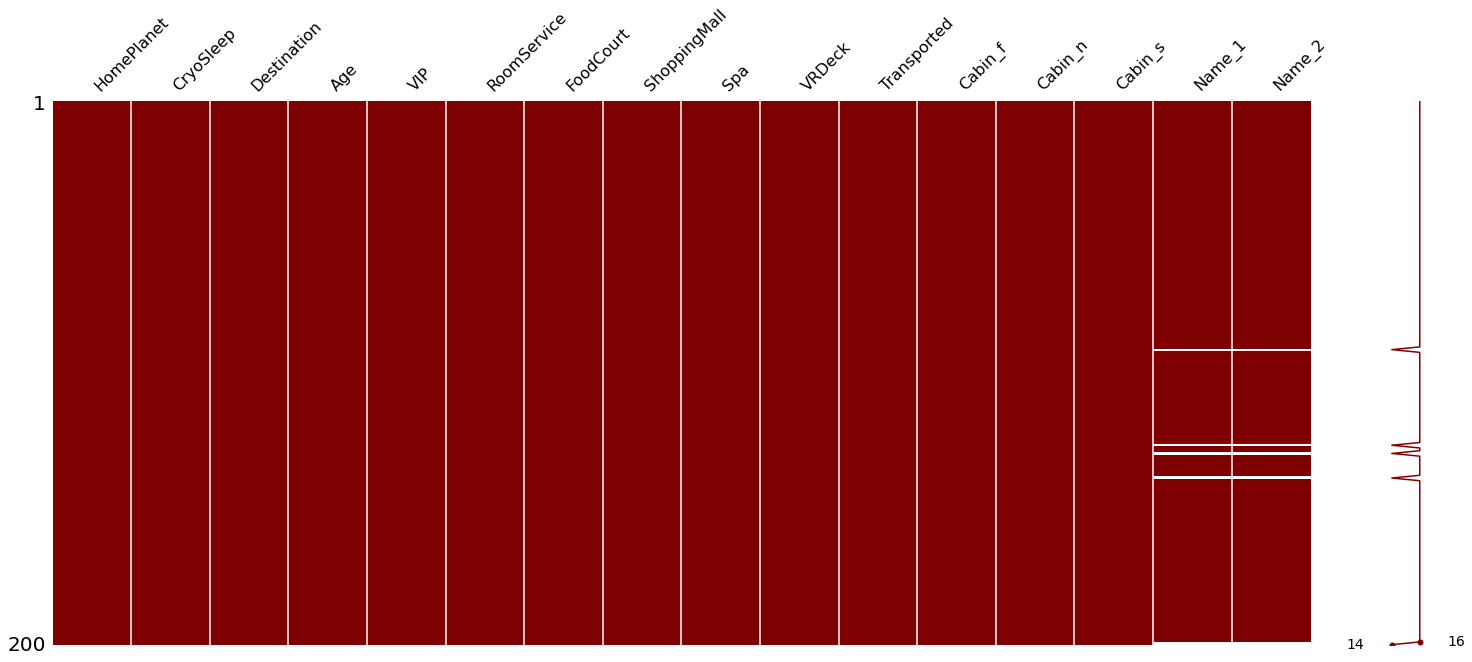

In [ ]:
msno.matrix(df_listo.sample(200), color=[0.5,0,0])

In [ ]:
df_listo.to_csv("train_imputed.csv")

# Modelado

### Preparación de Datos

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [ ]:
df_listo.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_n
count,7446.000000,7446.000000,7446.000000,7446.000000,7446.000000,7446.000000,7446.000000,7446.000000,7446.000000,7446.000000
mean,0.380849,0.361772,0.020441,0.057206,0.038555,0.057122,0.040658,0.038420,0.517459,0.319963
std,0.484465,0.182331,0.140711,0.141276,0.116171,0.143869,0.119140,0.112897,0.499729,0.270006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092367
50%,0.000000,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.231379
75%,1.000000,0.468354,0.000000,0.013342,0.004516,0.009931,0.008037,0.005414,1.000000,0.527734
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_listo.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cabin_f',
       'Cabin_n', 'Cabin_s', 'Name_1', 'Name_2'],
      dtype='object')

In [ ]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_cols = ["HomePlanet", "Destination", "Cabin_f", 'Cabin_s', 'Name_1', 'Name_2']

for col in label_cols:
    df_listo[col] = df_listo[col].astype(str)
    df_listo[col] = LabelEncoder().fit_transform(df_listo[col])
df_listo[label_cols] = scaler.fit_transform(df_listo[label_cols])
df_listo

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
0,0.5,0.0,1.0,0.721519,0.0,0.000000,0.484069,0.005613,0.039378,0.776820,0.0,0.285714,0.064976,0.0,0.111628,0.927205
1,1.0,1.0,1.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.714286,0.066561,1.0,0.785659,0.825478
2,0.5,1.0,1.0,0.417722,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.142857,0.181194,1.0,0.821318,0.917406
3,0.0,0.0,1.0,0.544304,0.0,0.045108,0.151530,0.000000,0.000000,0.040906,0.0,0.714286,0.750132,0.0,0.552326,0.399907
4,0.0,0.0,1.0,0.240506,0.0,0.000000,0.000000,0.289292,0.000202,0.006818,0.0,0.857143,0.004754,0.0,0.412791,0.281848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,1.0,0.0,1.0,0.151899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.714286,0.696778,1.0,0.777519,0.404106
7819,0.0,0.0,1.0,0.556962,0.0,0.000000,0.000000,0.321244,0.012520,0.000602,0.0,0.857143,0.242472,1.0,0.373643,0.760149
7820,1.0,1.0,1.0,0.696203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.714286,0.936080,0.0,0.706589,0.791881
7821,0.0,0.0,1.0,0.189873,0.0,0.000000,0.105369,0.053109,0.000000,0.004010,0.0,0.571429,0.133650,0.0,0.130233,0.968269


In [ ]:
df_entrenamiento = df_listo.drop(["Transported"],axis=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df_entrenamiento, df_listo.Transported, test_size=0.33, random_state=3)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC

### Modelo 1) Gradient Boosting Classifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
importancia = pd.DataFrame(clf.feature_importances_)

importancia

,0
0,0.005576
1,0.505109
2,0.005662
3,0.015391
4,0.000000
5,0.084670
6,0.078602
7,0.015973
8,0.080208
9,0.083323


In [ ]:
df_entrenamiento.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_f', 'Cabin_n',
       'Cabin_s', 'Name_1', 'Name_2'],
      dtype='object')

In [ ]:
# %%script echo skipping
grid_GB = GridSearchCV(GradientBoostingClassifier(),{
  "loss":("deviance", "exponential"),
  'n_estimators':(50,100,150),
  "learning_rate":(0.1,0.5,1.0),
  "max_depth":(1,3,6),
 })
grid_GB.fit(X_train,y_train)
grid_GB.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 3,
 'n_estimators': 150}

In [ ]:
clf2 = GradientBoostingClassifier(**grid_GB.best_params_)
clf2.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [ ]:
predictions = clf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79      1217
         1.0       0.78      0.84      0.81      1241

    accuracy                           0.80      2458
   macro avg       0.80      0.80      0.80      2458
weighted avg       0.80      0.80      0.80      2458



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


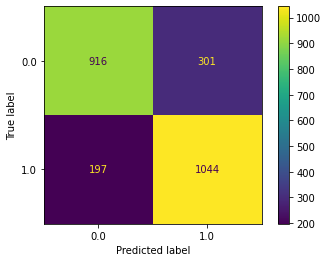

In [ ]:
plot_confusion_matrix(clf2,X_test,y_test)
plt.show()

In [ ]:
train_predictions = clf2.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf2.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,clf2.predict(X_test)))

Accuracy train: 83.70%
Accuracy test: 79.74%
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79      1217
         1.0       0.78      0.84      0.81      1241

    accuracy                           0.80      2458
   macro avg       0.80      0.80      0.80      2458
weighted avg       0.80      0.80      0.80      2458



### Modelo 2) Random Forest Classifier

In [ ]:
# %%script echo skipping
grid_RF = GridSearchCV(RandomForestClassifier(),
 {'n_estimators':(100,112,125,142,150),
 'random_state':(0,),
  "criterion" :("gini", "entropy"),
 })
grid_RF.fit(X_train,y_train)
grid_RF.best_params_

{'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}

In [ ]:
clf2 = RandomForestClassifier(**grid_RF.best_params_)
clf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [ ]:
predictions = clf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1217
         1.0       0.82      0.80      0.81      1241

    accuracy                           0.81      2458
   macro avg       0.81      0.81      0.81      2458
weighted avg       0.81      0.81      0.81      2458



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


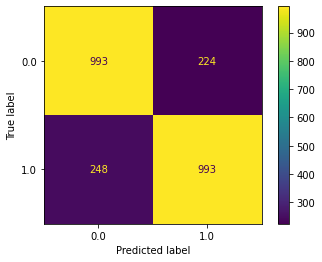

In [ ]:
plot_confusion_matrix(clf2,X_test,y_test)
plt.show()

In [ ]:
train_predictions = clf2.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf2.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,clf2.predict(X_test)))

Accuracy train: 100.00%
Accuracy test: 80.80%
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1217
         1.0       0.82      0.80      0.81      1241

    accuracy                           0.81      2458
   macro avg       0.81      0.81      0.81      2458
weighted avg       0.81      0.81      0.81      2458



### Modelo 3) K-Neighbors

In [ ]:
# %%script echo skipping
grid_KN = GridSearchCV(KNeighborsClassifier(),{
    "algorithm":("auto", "ball_tree", "kd_tree", "brute"),
    "leaf_size":(10,30,60),
})
grid_KN.fit(X_train,y_train)
grid_KN.best_params_    #auto y 10

{'algorithm': 'auto', 'leaf_size': 10}

In [ ]:
clf2 = KNeighborsClassifier(**grid_KN.best_params_)
clf2.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10)

In [ ]:
predictions = clf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      1217
         1.0       0.76      0.74      0.75      1241

    accuracy                           0.75      2458
   macro avg       0.75      0.75      0.75      2458
weighted avg       0.75      0.75      0.75      2458



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


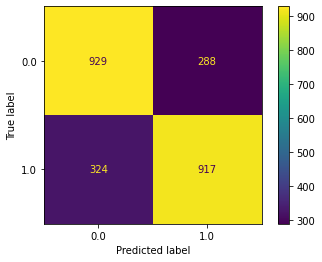

In [ ]:
plot_confusion_matrix(clf2,X_test,y_test)
plt.show()

In [ ]:
train_predictions = clf2.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf2.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,clf2.predict(X_test)))

Accuracy train: 82.98%
Accuracy test: 75.10%
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      1217
         1.0       0.76      0.74      0.75      1241

    accuracy                           0.75      2458
   macro avg       0.75      0.75      0.75      2458
weighted avg       0.75      0.75      0.75      2458



### Modelo 4) Nu-Support Vector Classification

In [ ]:
# %%script echo skipping
grid_NV = GridSearchCV(NuSVC(),{
    "kernel": ("linear", "poly", "rbf", "sigmoid"),
    "coef0":(0.0, 0.1, 0.5, 0.8)
})
grid_NV.fit(X_train,y_train)
grid_NV.best_params_      #0.1 y poly

{'coef0': 0.1, 'kernel': 'poly'}

In [ ]:
clf2 = NuSVC(**grid_NV.best_params_)
clf2.fit(X_train, y_train)

NuSVC(coef0=0.1, kernel='poly')

In [ ]:
predictions = clf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      1217
         1.0       0.80      0.77      0.78      1241

    accuracy                           0.79      2458
   macro avg       0.79      0.79      0.79      2458
weighted avg       0.79      0.79      0.79      2458



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


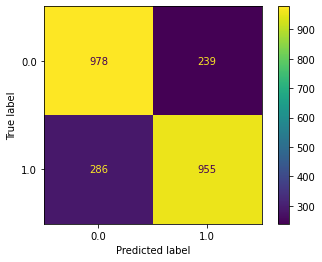

In [ ]:
plot_confusion_matrix(clf2,X_test,y_test)
plt.show()

In [ ]:
train_predictions = clf2.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf2.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,clf2.predict(X_test)))

Accuracy train: 79.55%
Accuracy test: 78.64%
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      1217
         1.0       0.80      0.77      0.78      1241

    accuracy                           0.79      2458
   macro avg       0.79      0.79      0.79      2458
weighted avg       0.79      0.79      0.79      2458



# Salida para Entregar

In [ ]:
import pandas as pd
import numpy

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv')
len(df)

870

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [ ]:
df_limpio_test = df.copy()

In [ ]:
# maneja bien los nulos y los nan
df_limpio_test[['Cabin_f','Cabin_n', "Cabin_s"]]=df_limpio_test.Cabin.str.split('/',expand=True)

In [ ]:
# todo valor en la columna name tiene un solo espacio
df_limpio_test[['Name_1','Name_2']]=df_limpio_test.Name.str.split(' ',expand=True)


In [ ]:
df_sin_redundancia_t = df_limpio_test.copy()
df_sin_redundancia_t.drop('Cabin', inplace=True, axis=1)
df_sin_redundancia_t.drop('Name', inplace=True, axis=1)

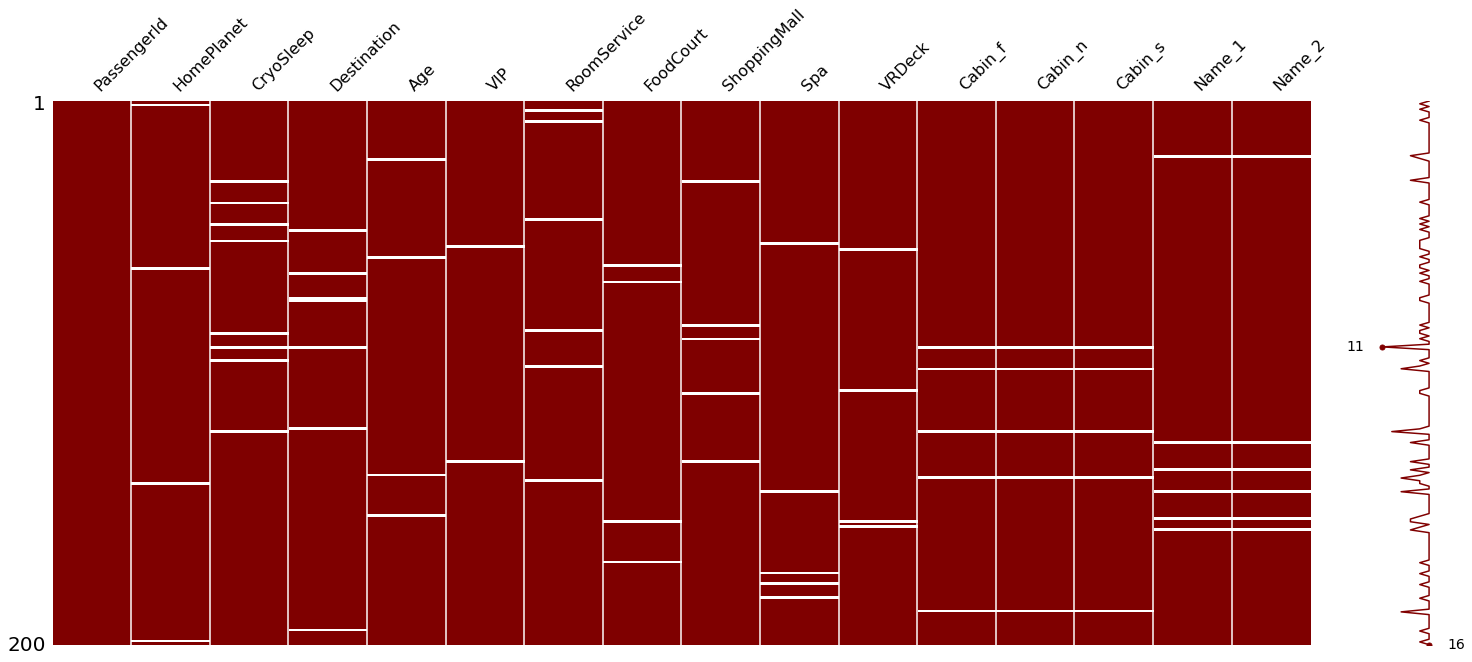

In [ ]:
import missingno as msno

msno.matrix(df_sin_redundancia_t.sample(200), color=[0.5,0,0])

In [ ]:
df_sin_redundancia_t.CryoSleep = pd.to_numeric(df_sin_redundancia_t.CryoSleep)
df_sin_redundancia_t.VIP = pd.to_numeric(df_sin_redundancia_t.VIP)
df_sin_redundancia_t.Cabin_n = pd.to_numeric(df_sin_redundancia_t.Cabin_n)
df_sin_redundancia_t[df_sin_redundancia_t.HomePlanet.isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
16,6591,NaN,0.0,TRAPPIST-1e,22.0,0.0,969.0,47.0,23.0,134.0,0.0,E,445.0,P,Weet,Flie
17,6054,NaN,0.0,TRAPPIST-1e,11.0,0.0,0.0,0.0,0.0,0.0,0.0,G,1032.0,P,Elene,Knoxonway
50,637,NaN,0.0,TRAPPIST-1e,28.0,0.0,NaN,0.0,7104.0,0.0,0.0,F,141.0,P,Cineys,Winie
83,1892,NaN,0.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G,322.0,S,Ellard,Kinson
173,7761,NaN,0.0,TRAPPIST-1e,45.0,0.0,0.0,1.0,233.0,453.0,17.0,F,1704.0,P,Iandy,Cooks
241,7155,NaN,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,847.0,1.0,G,1224.0,P,Dannie,Hebernandry
255,5081,NaN,1.0,TRAPPIST-1e,18.0,0.0,0.0,0.0,0.0,0.0,0.0,F,1118.0,P,Frohs,Stie
261,2281,NaN,1.0,PSO J318.5-22,16.0,0.0,0.0,0.0,0.0,0.0,0.0,G,395.0,S,Valey,Currisones
265,4154,NaN,0.0,TRAPPIST-1e,23.0,0.0,NaN,282.0,0.0,0.0,71.0,F,911.0,P,Aarone,Sweett
308,8325,NaN,0.0,55 Cancri e,17.0,0.0,0.0,0.0,615.0,0.0,0.0,G,1439.0,P,Erman,Russelloyd


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoded_t = df_sin_redundancia_t.copy(deep=True)

categorical_cols=['HomePlanet',"Destination","Cabin_f","Cabin_s"]
encoder = OneHotEncoder(sparse=False)
encoder.fit(encoded_t[categorical_cols])
# We can inspect the categories found by the encoder 
encoder.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', nan], dtype=object)]

In [ ]:
categorias_codificadas_t = encoder.transform(encoded_t[categorical_cols])
categorias_codificadas_t

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
df_en_t = pd.DataFrame(categorias_codificadas_t,index=encoded_t[categorical_cols].index)
df_en_t.columns = list(encoder.get_feature_names_out())

In [ ]:
for c in df_en_t.columns:
  if not c.endswith("nan"):
    c_nan = "_".join(c.split("_")[0:-1])  + "_nan"
    try:
      df_en_t[c] = numpy.where(df_en_t[c_nan] == 1, numpy.nan, df_en_t[c])
    except KeyError:
      continue

In [ ]:
df_en_t = df_en_t.drop([x for x in df_en_t.columns if x.endswith("_nan")], axis=1)
df_en_t

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_f_A,Cabin_f_B,Cabin_f_C,Cabin_f_D,Cabin_f_E,Cabin_f_F,Cabin_f_G,Cabin_f_T,Cabin_s_P,Cabin_s_S
0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
866,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
868,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
numerical_cols=[x for x in df_sin_redundancia_t.columns if x not in categorical_cols+['Name_1','Name_2','PassengerId']]
numerical_cols

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin_n']

In [ ]:
df_sin_redundancia_t

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
0,415,Europa,1.0,55 Cancri e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Minopus,Taptiritty
1,8663,Earth,1.0,PSO J318.5-22,13.0,0.0,0.0,0.0,0.0,0.0,0.0,G,1489.0,S,Chrisa,Francock
2,4524,Earth,0.0,TRAPPIST-1e,44.0,0.0,22.0,1.0,0.0,864.0,0.0,G,776.0,P,Elinda,Miley
3,8246,Earth,0.0,PSO J318.5-22,63.0,0.0,0.0,0.0,80.0,0.0,2322.0,E,577.0,S,Karley,Goods
4,2935,Europa,0.0,55 Cancri e,10.0,0.0,0.0,0.0,0.0,0.0,0.0,B,117.0,S,Arkard,Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,0.0,TRAPPIST-1e,54.0,0.0,676.0,0.0,231.0,379.0,0.0,F,1212.0,S,Anch,Perta
866,5478,Earth,1.0,TRAPPIST-1e,58.0,0.0,0.0,0.0,0.0,0.0,0.0,G,947.0,S,Hughy,Hessey
867,6760,Earth,1.0,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,G,1148.0,P,Heidie,Kimpson
868,1437,Earth,0.0,TRAPPIST-1e,18.0,0.0,765.0,0.0,13.0,0.0,0.0,F,293.0,S,Herina,Oconley


In [ ]:
df_encoded_t = df_en_t.join(df_sin_redundancia_t[numerical_cols])
df_encoded_t

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_f_A,Cabin_f_B,Cabin_f_C,Cabin_f_D,...,Cabin_s_S,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_n
0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1489.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,44.0,0.0,22.0,1.0,0.0,864.0,0.0,776.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,63.0,0.0,0.0,0.0,80.0,0.0,2322.0,577.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,54.0,0.0,676.0,0.0,231.0,379.0,0.0,1212.0
866,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,947.0
867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1148.0
868,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,18.0,0.0,765.0,0.0,13.0,0.0,0.0,293.0


## Imputo columnas numericas

In [ ]:

#KNN Imputer precisa que los datos esten estandarizados.
# Datos con diferentes escalas introducen valores de reemplazo sesgados 
#  Scikit-Learn’s MinMaxScaler escala las variables al [0,1].


scaler = MinMaxScaler()
df_imputed_t = df_encoded_t.copy(deep=True)
df_imputed_t = scaler.fit_transform(df_imputed_t)

imputer = IterativeImputer(estimator=KNeighborsRegressor())
df_imputed_t = imputer.fit_transform(df_imputed_t)

df_imputed_t = pd.DataFrame(df_imputed_t, index=df_encoded_t.index, columns=df_encoded_t.columns)

df_imputed_t = df_imputed_t.join(df_sin_redundancia_t[['Name_1',"Name_2"]])

In [ ]:
df_imputed_t[df_sin_redundancia_t.HomePlanet.isna()]

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_f_A,Cabin_f_B,Cabin_f_C,Cabin_f_D,...,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_n,Name_1,Name_2
16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.297297,0.0,0.164572,0.002702,0.002539,0.008951,0.000000,0.234952,Weet,Flie
17,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.148649,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.544879,Elene,Knoxonway
50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.378378,0.0,0.069124,0.000000,0.784279,0.000000,0.000000,0.074446,Cineys,Winie
83,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.170011,Ellard,Kinson
173,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.608108,0.0,0.000000,0.000057,0.025723,0.030261,0.000982,0.899683,Iandy,Cooks
241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.527027,0.0,0.000000,0.000000,0.000000,0.056580,0.000058,0.646251,Dannie,Hebernandry
255,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.590285,Frohs,Stie
261,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.216216,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.208553,Valey,Currisones
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.310811,0.0,0.017289,0.016212,0.000000,0.000000,0.004103,0.480993,Aarone,Sweett
308,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.229730,0.0,0.000000,0.000000,0.067896,0.000000,0.000000,0.759768,Erman,Russelloyd


In [ ]:
df_imputed_t["HomePlanet"]=df_imputed_t[["HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars"]].idxmax(axis=1).str.split('_', expand=True)[1]
df_imputed_t["Destination"]=df_imputed_t[["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]].idxmax(axis=1).str.split('_', expand=True)[1]
df_imputed_t["Cabin_f"]=df_imputed_t[['Cabin_f_A', 'Cabin_f_B', 'Cabin_f_C', 'Cabin_f_D', 'Cabin_f_E', 'Cabin_f_F', 'Cabin_f_G', 'Cabin_f_T']].idxmax(axis=1).str.split('_', expand=True)[2]
df_imputed_t["Cabin_s"]=df_imputed_t[['Cabin_s_P', 'Cabin_s_S']].idxmax(axis=1).str.split('_', expand=True)[2]

tirar = ["HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars"]
tirar += ["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]
tirar += ['Cabin_f_A', 'Cabin_f_B', 'Cabin_f_C', 'Cabin_f_D', 'Cabin_f_E', 'Cabin_f_F', 'Cabin_f_G', 'Cabin_f_T']
tirar += ['Cabin_s_P', 'Cabin_s_S']

df_imputed_t = df_imputed_t.drop(tirar, axis=1)


In [ ]:
df_listo_t = df_imputed_t[[x for x in df_sin_redundancia_t.columns if x != "PassengerId"]]

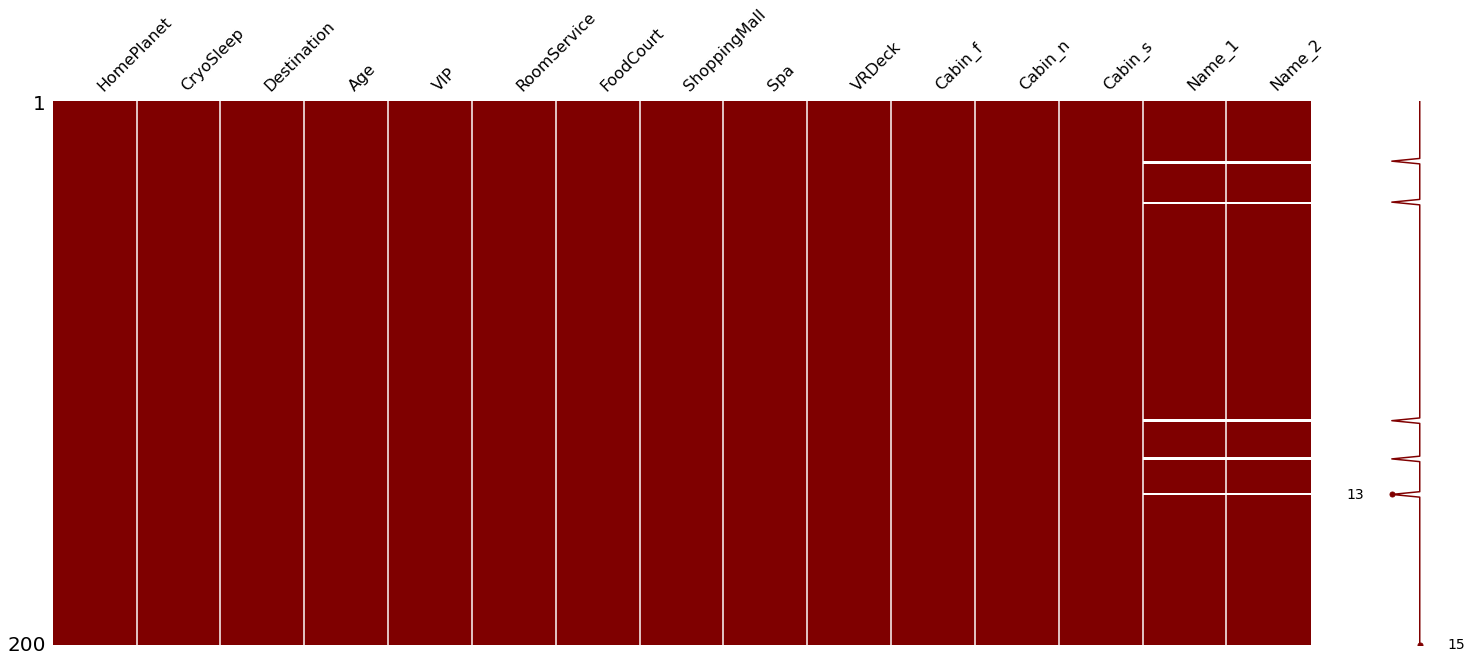

In [ ]:
msno.matrix(df_listo_t.sample(200), color=[0.5,0,0])

In [ ]:
df_listo_t

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
0,Europa,1.0,55 Cancri e,0.459459,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,B,0.114678,S,Minopus,Taptiritty
1,Earth,1.0,PSO J318.5-22,0.175676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,G,0.786167,S,Chrisa,Francock
2,Earth,0.0,TRAPPIST-1e,0.594595,0.0,0.003736,0.000057,0.000000,0.057715,0.000000,G,0.409715,P,Elinda,Miley
3,Earth,0.0,PSO J318.5-22,0.851351,0.0,0.000000,0.000000,0.008832,0.000000,0.134173,E,0.304646,S,Karley,Goods
4,Europa,0.0,55 Cancri e,0.135135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,B,0.061774,S,Arkard,Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,Mars,0.0,TRAPPIST-1e,0.729730,0.0,0.114810,0.000000,0.025502,0.025317,0.000000,F,0.639916,S,Anch,Perta
866,Earth,1.0,TRAPPIST-1e,0.783784,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,G,0.500000,S,Hughy,Hessey
867,Earth,1.0,PSO J318.5-22,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,G,0.606125,P,Heidie,Kimpson
868,Earth,0.0,TRAPPIST-1e,0.243243,0.0,0.129925,0.000000,0.001435,0.000000,0.000000,F,0.154699,S,Herina,Oconley


#Predigo

In [ ]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn.metrics import plot_confusion_matrix

In [ ]:
label_cols = ["HomePlanet", "Destination", "Cabin_f", 'Cabin_s', 'Name_1', 'Name_2']

for col in label_cols:
    df_listo_t[col] = df_listo_t[col].astype(str)
    df_listo_t[col] = LabelEncoder().fit_transform(df_listo_t[col])
df_listo_t[label_cols] = scaler.fit_transform(df_listo_t[label_cols])
df_listo_t

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2
0,0.5,1.0,0.0,0.459459,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.114678,1.0,0.679783,0.883453
1,0.0,1.0,0.5,0.175676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.786167,1.0,0.214383,0.323741
2,0.0,0.0,1.0,0.594595,0.0,0.003736,0.000057,0.000000,0.057715,0.000000,0.857143,0.409715,0.0,0.327001,0.579856
3,0.0,0.0,0.5,0.851351,0.0,0.000000,0.000000,0.008832,0.000000,0.134173,0.571429,0.304646,1.0,0.563094,0.374101
4,0.5,0.0,0.0,0.135135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.061774,1.0,0.081411,0.794245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.0,0.0,1.0,0.729730,0.0,0.114810,0.000000,0.025502,0.025317,0.000000,0.714286,0.639916,1.0,0.055631,0.673381
866,0.0,1.0,1.0,0.783784,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.500000,1.0,0.488467,0.421583
867,0.0,1.0,0.5,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.606125,0.0,0.461330,0.493525
868,0.0,0.0,1.0,0.243243,0.0,0.129925,0.000000,0.001435,0.000000,0.000000,0.714286,0.154699,1.0,0.476255,0.630216


In [ ]:
X_train_t = df_listo_t


In [ ]:
predictions_t = clf2.predict(X_train_t)

In [ ]:
predictions_t

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1.

In [ ]:
df_listo_t["Transported"] = predictions_t
df_listo_t

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_f,Cabin_n,Cabin_s,Name_1,Name_2,Transported
0,0.5,1.0,0.0,0.459459,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.114678,1.0,0.679783,0.883453,1.0
1,0.0,1.0,0.5,0.175676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.786167,1.0,0.214383,0.323741,1.0
2,0.0,0.0,1.0,0.594595,0.0,0.003736,0.000057,0.000000,0.057715,0.000000,0.857143,0.409715,0.0,0.327001,0.579856,0.0
3,0.0,0.0,0.5,0.851351,0.0,0.000000,0.000000,0.008832,0.000000,0.134173,0.571429,0.304646,1.0,0.563094,0.374101,0.0
4,0.5,0.0,0.0,0.135135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.061774,1.0,0.081411,0.794245,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.0,0.0,1.0,0.729730,0.0,0.114810,0.000000,0.025502,0.025317,0.000000,0.714286,0.639916,1.0,0.055631,0.673381,0.0
866,0.0,1.0,1.0,0.783784,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.500000,1.0,0.488467,0.421583,1.0
867,0.0,1.0,0.5,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.606125,0.0,0.461330,0.493525,1.0
868,0.0,0.0,1.0,0.243243,0.0,0.129925,0.000000,0.001435,0.000000,0.000000,0.714286,0.154699,1.0,0.476255,0.630216,0.0


In [ ]:
df_listo_t["PassengerId"] = df_sin_redundancia_t.PassengerId

In [ ]:
df_listo_t.PassengerId = df_listo_t.PassengerId.astype(int)
df_listo_t.Transported = df_listo_t.Transported.astype(int)
df_listo_t[["PassengerId","Transported"]]

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0


In [ ]:
df_listo_t[["PassengerId","Transported"]].to_csv("submission.csv", header=True, index=False)

# Lo que que estaba original:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv')
print(df.shape)
print(df.describe())
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


### Análisis exploratorio 

...que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

In [ ]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [ ]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.90%
Accuracy test {name}: 72.20%


### Ajuste de hiperparámetros

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Arbol de decisión: 81.86%
Accuracy test Arbol de decisión: 76.29%


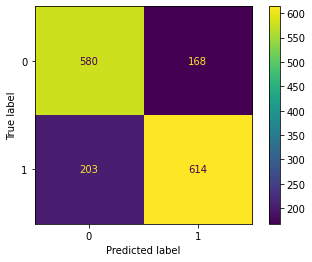

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       748
           1       0.79      0.75      0.77       817

    accuracy                           0.76      1565
   macro avg       0.76      0.76      0.76      1565
weighted avg       0.76      0.76      0.76      1565



In [ ]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 78.67
Precisión test fold 1: 77.88
Precisión test fold 2: 78.19
Precisión test fold 3: 77.54
Precisión test fold 4: 76.34
Avg. accuracy = 77.72426148538038


## Salida para entregar

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv')

In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [ ]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

In [ ]:
test_id = PassengerId
test_pred = clf.predict(test_df)

In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)